# Compare highly-rated with low-rated apps

In [2]:
dataset_meta = DatasetMeta(SchemaName.PLAY_STORE, PlayStoreDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,2018,4
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,1000000,Free,0.0,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,10000000,Free,0.0,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,1000000,Free,0.0,Everyone,2018,4
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,10000,Free,0.0,Everyone,2017,2


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('rating'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('reviews'), 
                aggregation_function=AggregationFunction.AVERAGE),
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('price'), 
                aggregation_function=AggregationFunction.AVERAGE),
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('installs'), 
                aggregation_function=AggregationFunction.AVERAGE),
    FilterAction(filtered_column=Column('rating'), filter_operator=FilterOperator.LOWER, filter_term=2),
    BackAction(),
    FilterAction(filtered_column=Column('rating'), filter_operator=FilterOperator.GREATER, filter_term=4.7),
    ]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

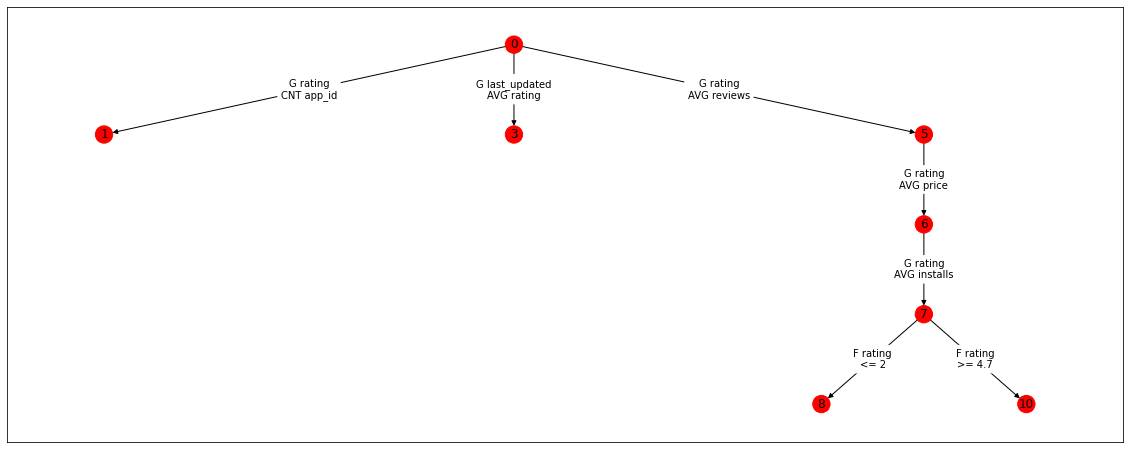

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by rating CNT(app_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,app_id
rating,
1.00,16
1.20,1
1.40,3
1.50,3
1.60,4
1.70,8
1.80,8
1.90,12
2.00,11


### Query 3: <span style="color:blue;">Group by last_updated AVG(rating)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 2))

,rating
last_updated,
2010,4.20
2011,3.97
2012,3.76
2013,4.08
2014,4.03
2015,4.06
2016,4.03
2017,4.09
2018,4.23


### Query 5: <span style="color:blue;">Group by rating AVG(reviews)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 4))

,reviews
rating,
1.00,1.75
1.20,44.00
1.40,32.67
1.50,20.33
1.60,172.75
1.70,295.00
1.80,427.25
1.90,294.25
2.00,270.36


### Query 6: <span style="color:DimGray">Group by rating AVG(reviews) AND</span> <span style="color:blue;">Group by rating AVG(price)</span>

In [8]:
display(prepare_display(action_execution_result_lst, 5))

,reviews,price
rating,,
1.00,1.75,0.28
1.20,44.00,0.00
1.40,32.67,0.00
1.50,20.33,0.00
1.60,172.75,0.00
1.70,295.00,0.62
1.80,427.25,0.19
1.90,294.25,0.00
2.00,270.36,0.00


### Query 7: <span style="color:DimGray">Group by rating AVG(reviews) AND Group by rating AVG(price) AND</span> <span style="color:blue;">Group by rating AVG(installs)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 6))

,reviews,price,installs
rating,,,
1.00,1.75,0.28,"1,000.00"
1.20,44.00,0.00,"1,000.00"
1.40,32.67,0.00,"4,000.00"
1.50,20.33,0.00,"1,000.00"
1.60,172.75,0.00,"253,000.00"
1.70,295.00,0.62,"5,500.00"
1.80,427.25,0.19,"128,125.00"
1.90,294.25,0.00,"254,500.00"
2.00,270.36,0.00,"913,272.73"


### Query 8: <span style="color:DimGray">Group by rating AVG(reviews) AND Group by rating AVG(price) AND Group by rating AVG(installs) AND</span> <span style="color:blue;">Filter rating <= 2</span>

In [10]:
display(prepare_display(action_execution_result_lst, 7))

,reviews,price,installs
rating,,,
1.00,1.75,0.28,"1,000.00"
1.20,44.00,0.00,"1,000.00"
1.40,32.67,0.00,"4,000.00"
1.50,20.33,0.00,"1,000.00"
1.60,172.75,0.00,"253,000.00"
1.70,295.00,0.62,"5,500.00"
1.80,427.25,0.19,"128,125.00"
1.90,294.25,0.00,"254,500.00"
2.00,270.36,0.00,"913,272.73"


### Query 10: <span style="color:DimGray">Group by rating AVG(reviews) AND Group by rating AVG(price) AND Group by rating AVG(installs) AND</span> <span style="color:blue;">Filter rating >= 4.7</span>

In [11]:
display(prepare_display(action_execution_result_lst, 9))

,reviews,price,installs
rating,,,
4.70,"91,961.69",0.50,"2,183,045.67"
4.80,"78,821.87",0.71,"1,246,832.54"
4.90,"15,753.88",0.23,"538,750.00"
5.00,8.38,0.38,"1,134.33"
